In [1]:
import csv
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from fake_useragent import UserAgent

def get_random_user_agent():
    ua = UserAgent()
    return ua.random

def scrape_linkedin_data(first_name, last_name, email, password):
    try:
        print("Initializing LinkedIn scraper...")
        
        # Initialize Chrome webdriver with a random user-agent
        options = webdriver.ChromeOptions()
        options.add_argument(f'user-agent={get_random_user_agent()}')
        driver = webdriver.Chrome(options=options)
        
        print("Logging into LinkedIn...")
        
        # Navigate to the LinkedIn login page
        driver.get("https://www.linkedin.com/login")
        time.sleep(3)  # Let the page load
        
        # Fill in email and password and click sign in
        email_input = driver.find_element(By.ID, "username")
        email_input.send_keys(email)
        password_input = driver.find_element(By.ID, "password")
        password_input.send_keys(password)
        password_input.send_keys(Keys.RETURN)
        time.sleep(3)  # Let the page load
        
        print("Logged in successfully.")
        
        # Construct the search URL
        search_url = f"https://www.linkedin.com/search/results/people/?keywords={first_name}%20{last_name}&origin=SWITCH_SEARCH_VERTICAL&sid=OGm"
        
        print(f"Searching for profiles matching '{first_name} {last_name}'...")
        
        # Navigate to the search URL
        driver.get(search_url)
        time.sleep(3)  # Let the search results load
        
        # Parse the HTML using BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        profiles = soup.find_all('span', class_='entity-result__title-text')
        
        # Extract top profiles data
        top_profiles = []
        for profile in profiles[:10]:  # Get data for first 10 search results
            name_element = profile.find('span', class_='visually-hidden')
            if name_element:
                name = name_element.text.strip()
                profile_link = profile.find('a')['href']
                connection = profile.find('span', class_='image-text-lockup__text').text.strip()
                primary_subtitle = profile.find_next('div', class_='entity-result__primary-subtitle').text.strip()
                secondary_subtitle = profile.find_next('div', class_='entity-result__secondary-subtitle').text.strip()
                top_profiles.append({'Name': name, 'Profile Link': profile_link, 'Connection': connection,
                                     'Primary Subtitle': primary_subtitle, 'Secondary Subtitle': secondary_subtitle})
        
        # Print top profiles data
        print("\nTop profiles:")
        for idx, profile in enumerate(top_profiles, start=1):
            print(f"\nProfile {idx}:")
            print("Name:", profile['Name'])
            print("Profile Link:", profile['Profile Link'])
            print("Connection:", profile['Connection'])
            print("Primary Subtitle:", profile['Primary Subtitle'])
            print("Secondary Subtitle:", profile['Secondary Subtitle'])
        
        # Write data to CSV file
        csv_filename = 'linkedin_profiles.csv'
        with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
            fieldnames = ['Name', 'Profile Link', 'Connection', 'Primary Subtitle', 'Secondary Subtitle']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for profile in top_profiles:
                writer.writerow(profile)
        
        print(f"\nScraped data saved to '{csv_filename}'.")
        
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:
        # Quit the webdriver
        if 'driver' in locals():
            driver.quit()
            print("LinkedIn scraping completed.")
    
# Example usage
first_name = input("Enter the first name: ")
last_name = input("Enter the last name: ")
email = 'tanmayhai28@gmail.com'
password = 'tanmay000'

scrape_linkedin_data(first_name, last_name, email, password)


Enter the first name:  tanmay
Enter the last name:  singh


Initializing LinkedIn scraper...
Logging into LinkedIn...
Logged in successfully.
Searching for profiles matching 'tanmay singh'...

Top profiles:

Profile 1:
Name: View Tanmay Singh’s profile
Profile Link: https://www.linkedin.com/in/tanmay-singh-53950721a?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAADc_jj0BsO4fw0PdoNB-ekReBFQXqmbojlY
Connection: • 3rd+3rd+ degree connection
Primary Subtitle: Student at Delhi University
Secondary Subtitle: Delhi, India

Profile 2:
Name: View Tanmay Singh’s profile
Profile Link: https://www.linkedin.com/in/tanmay-singh-6438a1201?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAADORJFMB2oY9eXCgxnSBh-49Ee89hD836XI
Connection: • 3rd+3rd+ degree connection
Primary Subtitle: Student at JAYPEE INSTITUTE OF INFORMATION TECHNOLOGY
Secondary Subtitle: Delhi, India

Profile 3:
Name: View Tanmay Singh’s profile
Profile Link: https://www.linkedin.com/in/tanmay-singh?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAACQ2SBUBnS92Q-sfx1bAKZK7c1dSDvFxXTE
Connection: • 3

In [48]:
import pandas as pd

# Read CSV file
csvData = pd.read_csv("linkedin_profiles.csv") 

# Normalize column names
csvData.columns = csvData.columns.str.strip().str.lower().str.replace(' ', '_')

# Sort the data by 'name' column
csvData_sorted = csvData.sort_values(by='name')

# Displaying sorted data frame
print("\nAfter sorting:")
print(csvData_sorted)



After sorting:
                         name  \
0  View TANMAY JAIN’s profile   
9  View TANMAY JAIN’s profile   
1  View Tanmay Jain’s profile   
2  View Tanmay Jain’s profile   
3  View Tanmay Jain’s profile   
4  View Tanmay Jain’s profile   
5  View Tanmay Jain’s profile   
6  View Tanmay Jain’s profile   
7  View Tanmay Jain’s profile   
8  View Tanmay Jain’s profile   

                                        profile_link  \
0  https://www.linkedin.com/in/tanmay-jain-0427a3...   
9  https://www.linkedin.com/in/tanmay1134?miniPro...   
1  https://www.linkedin.com/in/tanmay-jain-aa6a61...   
2  https://www.linkedin.com/in/tanmay-jain-660393...   
3  https://www.linkedin.com/in/tanmay-jain-b16aa1...   
4  https://www.linkedin.com/in/-tanmayjain?miniPr...   
5  https://www.linkedin.com/in/tanmay14?miniProfi...   
6  https://www.linkedin.com/in/tanmay-jain-21378b...   
7  https://www.linkedin.com/in/tanmayjain16?miniP...   
8  https://www.linkedin.com/in/tanmay-jain-24a576...   

   

In [51]:
df.columns

Index(['Name', 'Primary Subtitle', 'Secondary Subtitle', 'Profile Link',
       'Connection'],
      dtype='object')

In [13]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('linkedin_profiles.csv')

# Clean and format the data
df['Name'] = df['Name'].str.replace(r'^View\s', '', regex=True).str.strip()
df['Profile Link'] = df['Profile Link'].str.replace(r'\?miniProfile.*$', '', regex=True)
df['Connection'] = df['Connection'].str.replace(r'•\s+', '', regex=True)
df['Primary Subtitle'] = df['Primary Subtitle'].str.strip()
df['Secondary Subtitle'] = df['Secondary Subtitle'].str.strip()

# Display the cleaned and formatted DataFrame
print(df)

                    Name                                       Profile Link  \
0  TANMAY JAIN’s profile  https://www.linkedin.com/in/tanmay-jain-0427a3209   
1  Tanmay Jain’s profile  https://www.linkedin.com/in/tanmay-jain-aa6a61119   
2  Tanmay Jain’s profile  https://www.linkedin.com/in/tanmay-jain-660393203   
3  Tanmay Jain’s profile  https://www.linkedin.com/in/tanmay-jain-b16aa1256   
4  Tanmay Jain’s profile            https://www.linkedin.com/in/-tanmayjain   
5  Tanmay Jain’s profile               https://www.linkedin.com/in/tanmay14   
6  Tanmay Jain’s profile  https://www.linkedin.com/in/tanmay-jain-21378b146   
7  Tanmay Jain’s profile           https://www.linkedin.com/in/tanmayjain16   
8  Tanmay Jain’s profile  https://www.linkedin.com/in/tanmay-jain-24a5761ab   
9  TANMAY JAIN’s profile             https://www.linkedin.com/in/tanmay1134   

                   Connection  \
0  3rd+3rd+ degree connection   
1  3rd+3rd+ degree connection   
2  3rd+3rd+ degree connection  

In [53]:
df.shape

(10, 5)

In [11]:
df

,Name,Profile Link,Connection,Primary Subtitle,Secondary Subtitle
0,TANMAY JAIN’s profile,https://www.linkedin.com/in/tanmay-jain-0427a3209,3rd+3rd+ degree connection,The Oberoi Hotels & Resorts,New Delhi
1,Tanmay Jain’s profile,https://www.linkedin.com/in/tanmay-jain-aa6a61119,3rd+3rd+ degree connection,Consultant | Ex - Product Intern @ Unilever | ...,"Delhi, India"
2,Tanmay Jain’s profile,https://www.linkedin.com/in/tanmay-jain-660393203,3rd+3rd+ degree connection,SDE @NewGen IT | XR Developer,"Delhi, India"
3,Tanmay Jain’s profile,https://www.linkedin.com/in/tanmay-jain-b16aa1256,3rd+3rd+ degree connection,"BMS,DDUC'25/26 | University of Delhi || Co-fou...","Delhi, India"
4,Tanmay Jain’s profile,https://www.linkedin.com/in/-tanmayjain,3rd+3rd+ degree connection,Management Consulting -BFSI | IÉSEG School of ...,Faridabad
5,Tanmay Jain’s profile,https://www.linkedin.com/in/tanmay14,3rd+3rd+ degree connection,Credit Risk Analyst @ Wells Fargo | IITG MnC'22,"Delhi, India"
6,Tanmay Jain’s profile,https://www.linkedin.com/in/tanmay-jain-21378b146,3rd+3rd+ degree connection,Advocate | B.A. LLB (Hons.),India
7,Tanmay Jain’s profile,https://www.linkedin.com/in/tanmayjain16,3rd+3rd+ degree connection,Seeking Marketing Opportunities,"Delhi, India"
8,Tanmay Jain’s profile,https://www.linkedin.com/in/tanmay-jain-24a5761ab,3rd+3rd+ degree connection,Student at SRM University | Developer,Noida
9,TANMAY JAIN’s profile,https://www.linkedin.com/in/tanmay1134,3rd+3rd+ degree connection,Mentor at InternWare | Business development,New Delhi


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                10 non-null     object
 1   Primary Subtitle    10 non-null     object
 2   Secondary Subtitle  10 non-null     object
 3   Profile Link        10 non-null     object
 4   Connection          10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes


<Axes: title={'center': 'Most People from'}, xlabel='Secondary Subtitle'>

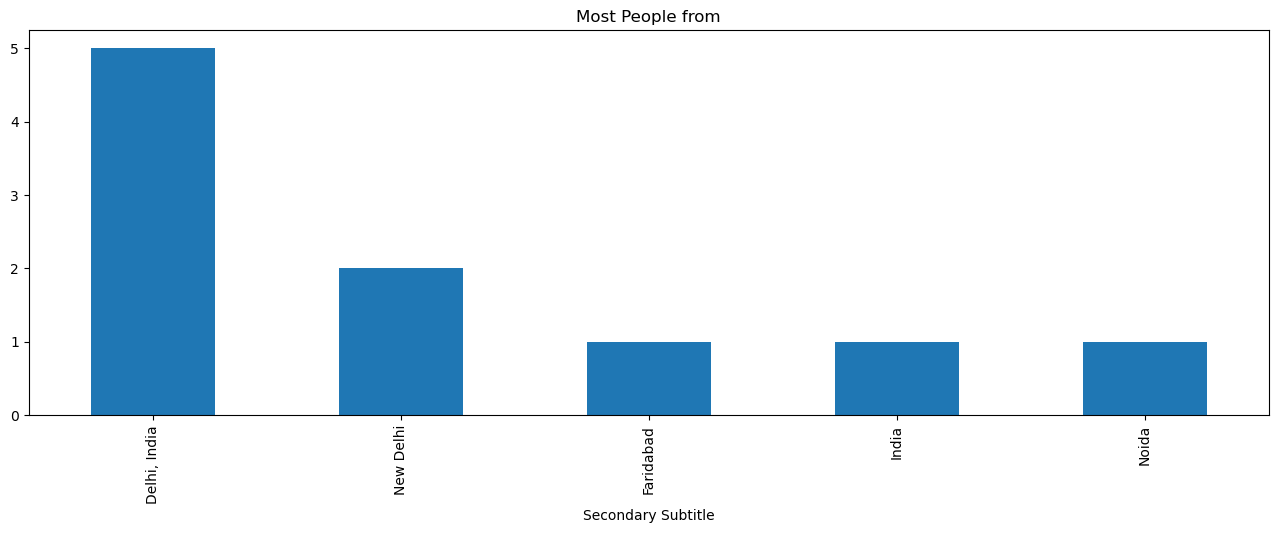

In [10]:
df['Secondary Subtitle'].value_counts().head(50).plot.bar(figsize=(16,5),title= 'Most People from')